In [1]:
from unet_prax.src.datas import *
from unet_prax.src.models import *
import matplotlib.pyplot as plt
import torchvision
import torch.nn.functional as F

/home/mfromano/anaconda3/envs/unet_prax-env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

def load_checkpoint(fname: str='model.pth') -> nn.Module:
    checkpoint_dict = torch.load(fname)
    net = UNet(channel_list=(1,12,24,48,96,192,))
    net.load_state_dict(checkpoint_dict['model_state_dict'])
    return net

def predict(mdl: UNet, sample: int):
    test_data = MnistData(False)
    with torch.no_grad():
        pred = F.sigmoid(mdl(test_data[sample][0].unsqueeze(0)))
    input_cropped = (transforms.CenterCrop(pred.shape[2:3])(test_data[sample][0]).squeeze())
    output = np.concatenate([pred.squeeze(), input_cropped], axis=1)
    plt.imshow(output)


tensor(0.9593) tensor(0.0007)


/home/mfromano/anaconda3/envs/unet_prax-env/lib/python3.9/site-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


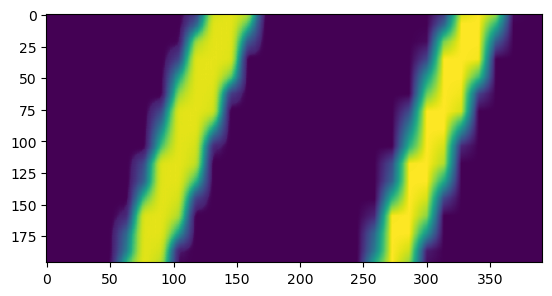

In [3]:
net = load_checkpoint()
predict(net, 5)